In [1]:
import pandas as pd
import matplotlib.pyplot as plt



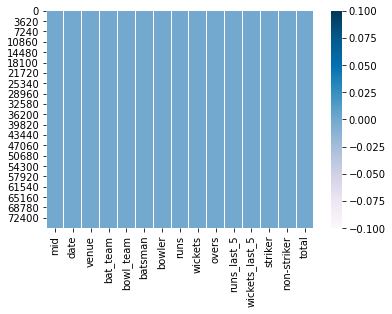

In [298]:
import seaborn as sns
sns.heatmap(df.isnull(),cmap='PuBu')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002397AA4AE20>],
      dtype=object)

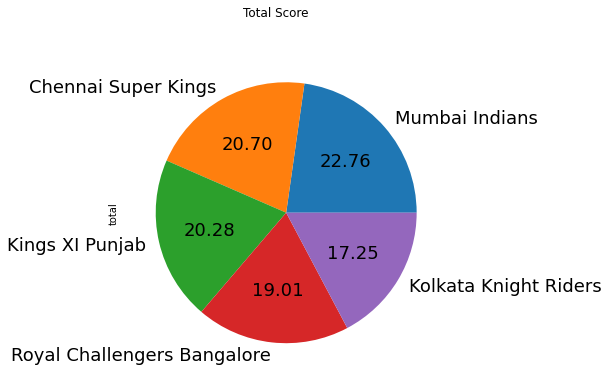

In [34]:
fig = plt.figure(figsize=(12,6))

df.groupby("bat_team")['total'].sum().nlargest(5).plot(kind="pie",subplots=True,title = "Total Score",autopct='%.2f', fontsize=18)


M Chinnaswamy Stadium


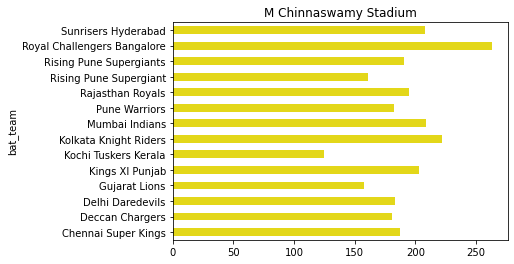

Punjab Cricket Association Stadium, Mohali


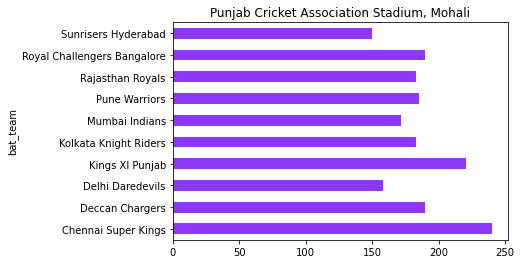

Feroz Shah Kotla


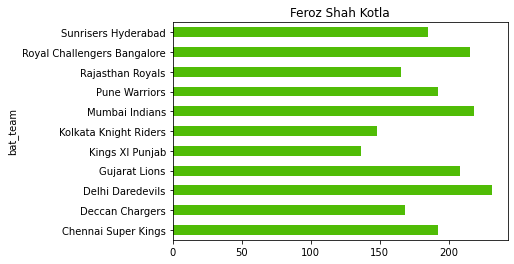

Wankhede Stadium


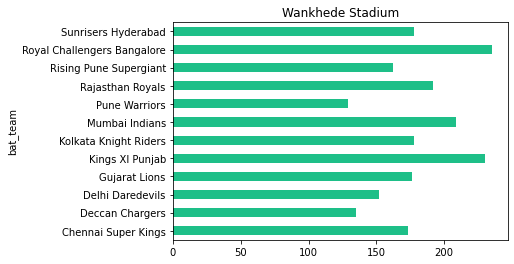

Eden Gardens


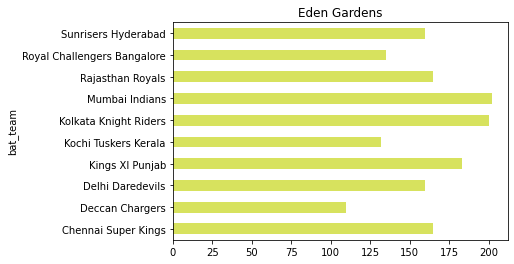

Sawai Mansingh Stadium


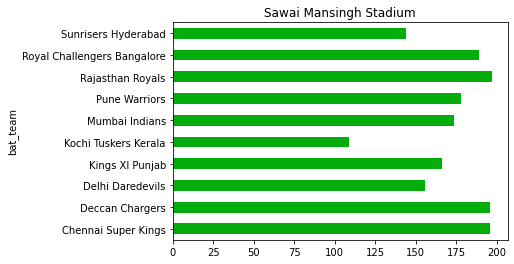

Rajiv Gandhi International Stadium, Uppal


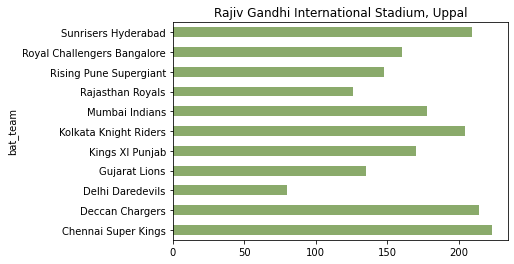

MA Chidambaram Stadium, Chepauk


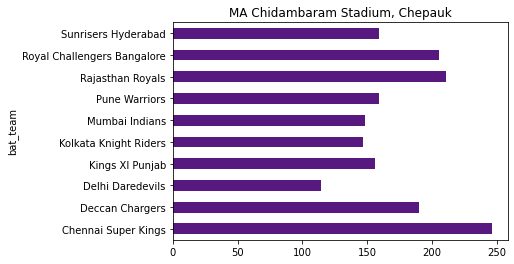

Dr DY Patil Sports Academy


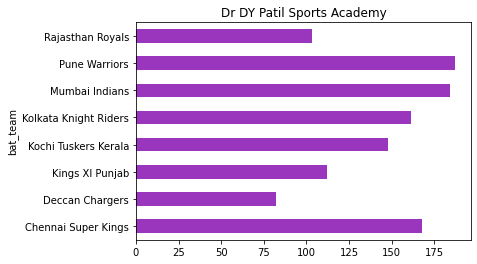

Newlands


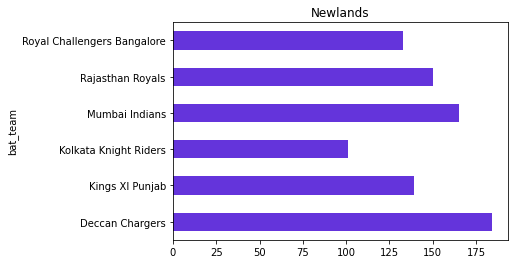

St George's Park


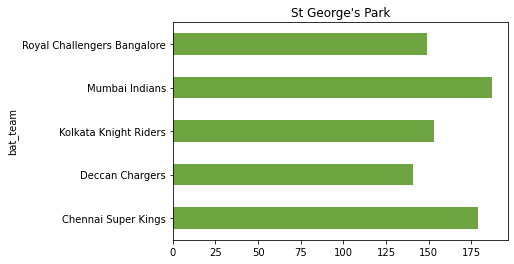

Kingsmead


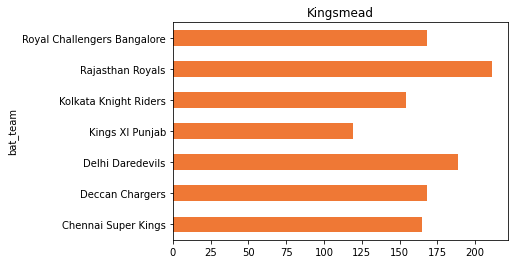

SuperSport Park


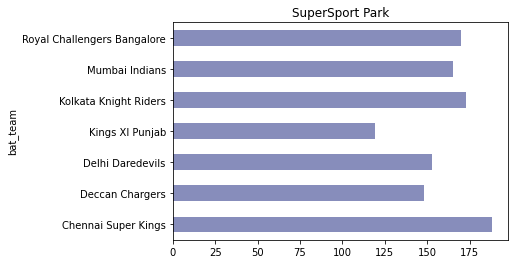

Buffalo Park


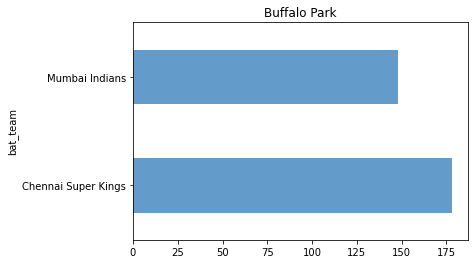

New Wanderers Stadium


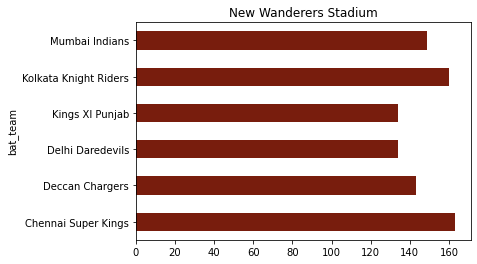

De Beers Diamond Oval


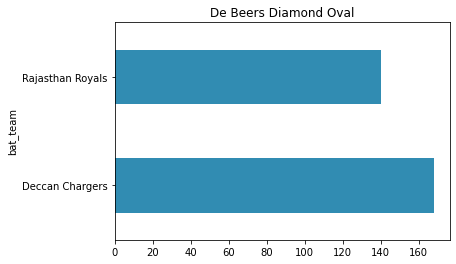

OUTsurance Oval


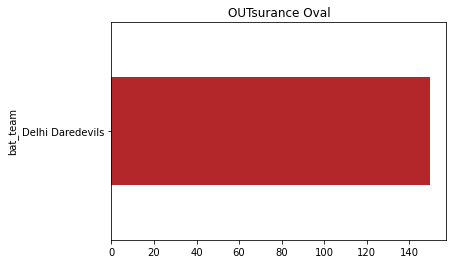

Brabourne Stadium


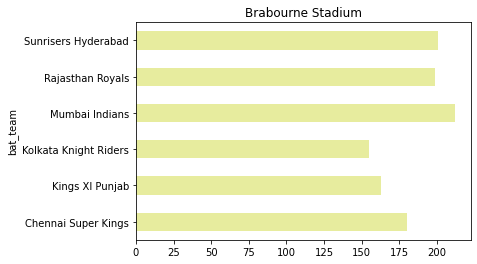

Sardar Patel Stadium, Motera


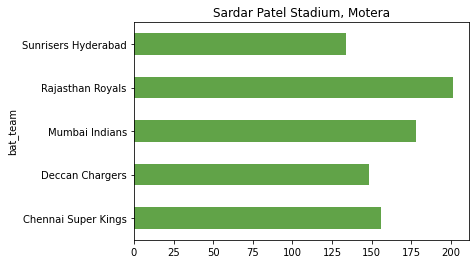

Barabati Stadium


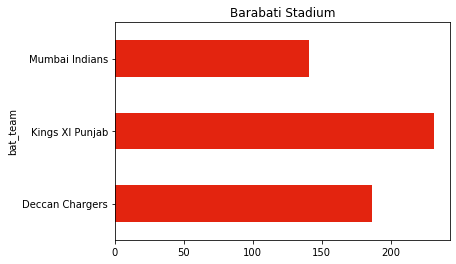

Vidarbha Cricket Association Stadium, Jamtha


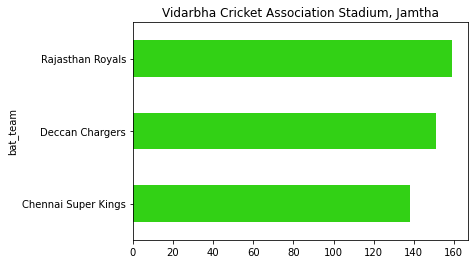

Himachal Pradesh Cricket Association Stadium


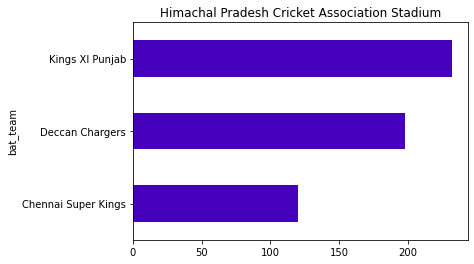

Nehru Stadium


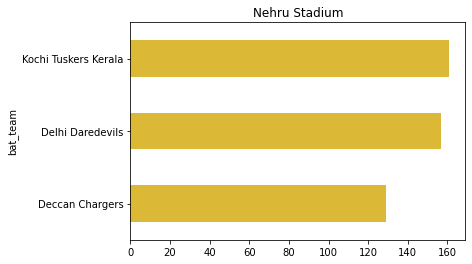

Holkar Cricket Stadium


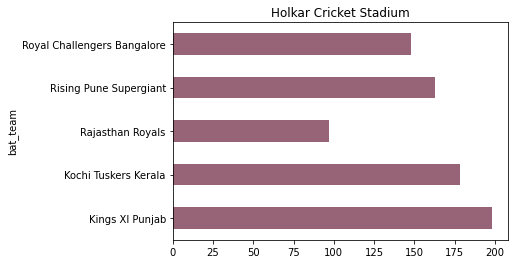

Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium


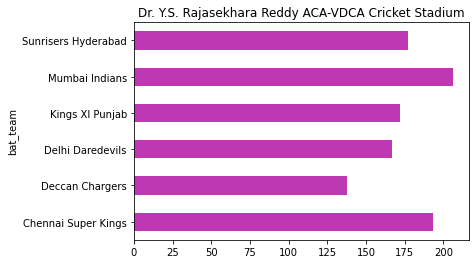

Subrata Roy Sahara Stadium


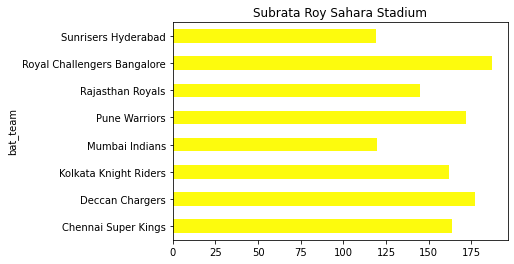

Shaheed Veer Narayan Singh International Stadium


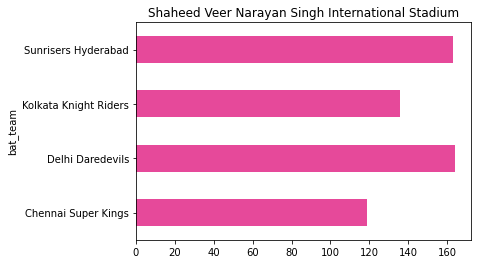

JSCA International Stadium Complex


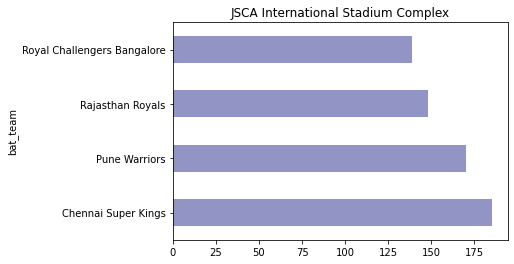

Sheikh Zayed Stadium


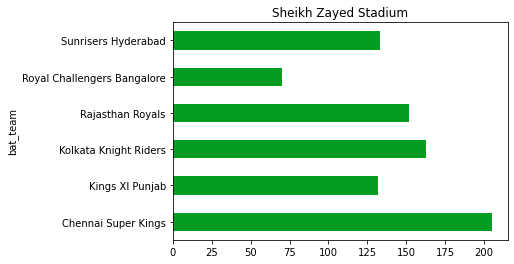

Sharjah Cricket Stadium


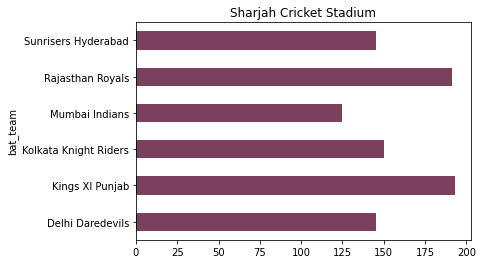

Dubai International Cricket Stadium


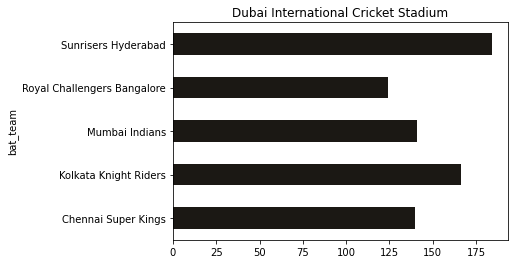

Maharashtra Cricket Association Stadium


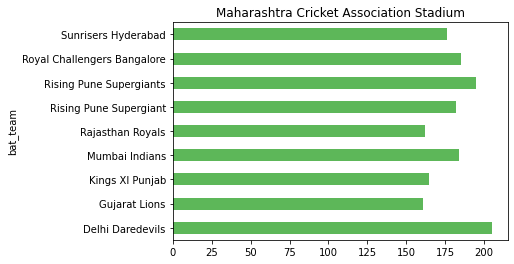

Punjab Cricket Association IS Bindra Stadium, Mohali


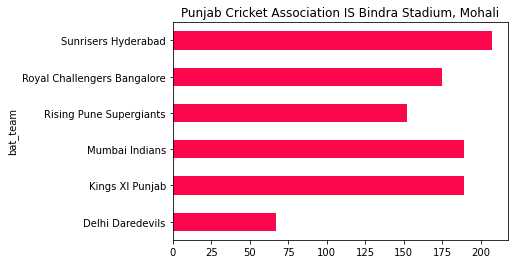

Saurashtra Cricket Association Stadium


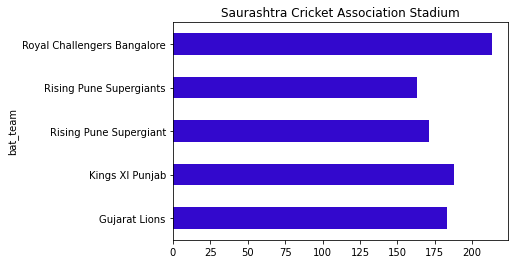

Green Park


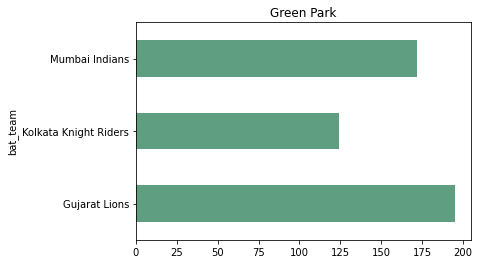

In [257]:
venues=df['venue'].unique()
#fig = plt.figure(figsize=(20,15))
for i in venues:
    print(i)
    df[df['venue']==i].groupby('bat_team').max()['total'].plot(kind='barh',title=i,color=np.random.rand(3,))
    plt.show()

In [196]:
team=df['bat_team'].unique()

In [128]:
mid=df[(df['batsman']=="V Kohli")]['mid'].unique()

In [139]:
for i in mid:
    print(df[(df['batsman']=="V Kohli") & (df['mid']==i)]['runs'].max(), "\t",df[(df['batsman']=="V Kohli") & (df['mid']==i)]['runs'].min())

77 	 61
69 	 1
76 	 76
49 	 1
33 	 7
104 	 27
63 	 52
142 	 136
139 	 73
133 	 80
72 	 29
170 	 135
20 	 17
110 	 67
117 	 55
172 	 68
19 	 0
169 	 57
155 	 47
175 	 30
151 	 114
56 	 39
198 	 53
23 	 0
134 	 7
95 	 81
11 	 11
215 	 21
28 	 7
85 	 9
133 	 6
207 	 167
123 	 45
99 	 38
166 	 22
183 	 12
46 	 16
144 	 103
106 	 0
46 	 1
25 	 25
6 	 0
45 	 33
141 	 5
150 	 31
93 	 3
119 	 1
235 	 8
46 	 7
23 	 7
163 	 1
177 	 12
91 	 1
182 	 1
180 	 0
129 	 10
64 	 0
8 	 0
248 	 1
110 	 2
159 	 1
22 	 1
40 	 1
20 	 0
118 	 30


In [21]:
#df=df[[ 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
#       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
#       'non-striker', 'total']]
dataset = df.copy()

In [22]:
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [31]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((57010, 5), (57010,), (19004, 5), (19004,))

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [35]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = lin.predict(x_test)
score = lin.score(x_test,y_test)*100
print(score)

50.46425554126013


In [41]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
reg.fit(x_train,y_train)
y_pred1 = reg.predict(x_test)


In [38]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [42]:
custom_accuracy(y_test,y_pred1,20)

84.08229846348138

In [52]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score : Linear Reg" , new_prediction[0])
new_prediction = reg.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Predict score of  Random Forest Reg: ",new_prediction[0])

Prediction score : Linear Reg 179.93993889513325
Predict score of  Random Forest Reg:  176.35


In [292]:
import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Input 

dfk = df.iloc[:,[7,8,9,12,13]]
dfk=dfk.values
final_score = df.iloc[:,14].values
dfk.shape[1]

5

In [293]:
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=dfk.shape[1]))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1024,activation="relu"))
model.add(Dense(512,activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(256,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#model.fit(dfk, final_score, batch_size=70, epochs=20,validation_split=0.33)

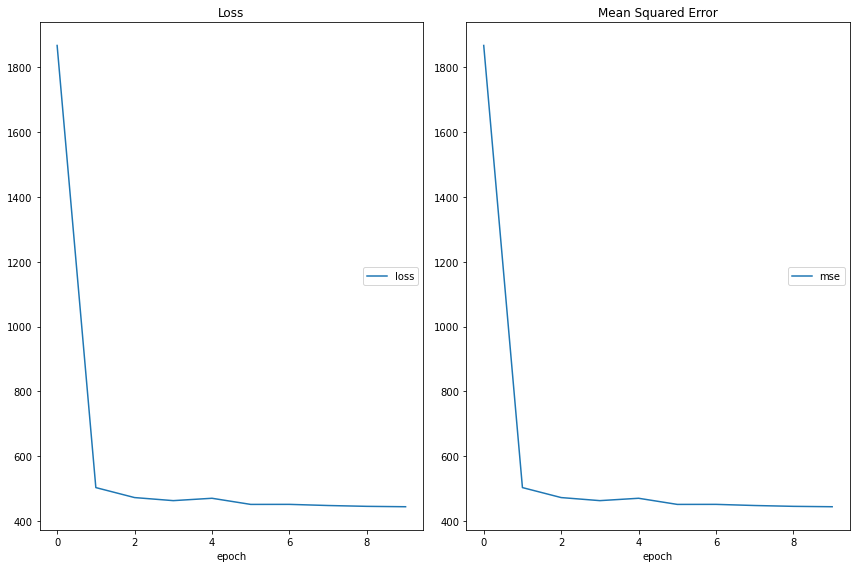

Loss
	loss             	 (min:  444.512, max: 1867.128, cur:  444.512)
Mean Squared Error
	mse              	 (min:  444.512, max: 1867.128, cur:  444.512)


In [294]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model
from livelossplot import PlotLossesKeras

callbacks=[PlotLossesKeras()]

model.fit(dfk, final_score,
          epochs=10,
          batch_size=100,
          callbacks=callbacks,
          verbose=0)

In [295]:
model.predict(np.array([[100,0,13,50,50]]))

array([[168.76984]], dtype=float32)